In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

cat_list_file = 'list_category_cloth.txt'
cat_img_file = 'list_category_img.txt'
eval_file = os.path.join('list_eval_partition.txt')

In [9]:
def get_category_list():
    category_list = pd.read_csv(cat_list_file, sep='\s+', header=1)
    category_list = category_list.join(pd.DataFrame(data=list(range(1,51)), columns=["category_label"]))
    return category_list

In [26]:
get_category_list().head(50)

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2
2,Blouse,1,3
3,Bomber,1,4
4,Button-Down,1,5
5,Cardigan,1,6
6,Flannel,1,7
7,Halter,1,8
8,Henley,1,9
9,Hoodie,1,10


In [11]:
def get_image_category():
    return pd.read_csv(cat_img_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [12]:
get_image_category().head(10)

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3


In [13]:
def get_image_eval():
    return pd.read_csv(eval_file, sep='\s+', header=1, engine='python') #, dtype={"image_name": np.string_, "category_label":np.int32})

In [14]:
get_image_eval().head(10)

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,train


In [15]:
def get_data():
    category_list = get_category_list()
    image_category = get_image_category()
    category_list = get_category_list()
    data = image_category
    data = data.merge(category_list, on="category_label", how="left")
    image_eval = get_image_eval()
    data = data.merge(image_eval, on="image_name", how="left")
    return data

In [16]:
data = get_data()
data.head(10)

,image_name,category_label,category_name,category_type,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,test
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,3,Blouse,1,val
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,3,Blouse,1,test
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,train


In [17]:
# Eval type is either, train, test or eval.
def filter_by_eval_type(data, eval_type):
    return data[data['evaluation_status']==eval_type]

In [18]:
# Dividing data into training, test and eval
training_data = filter_by_eval_type(data, "train")
test_data = filter_by_eval_type(data, "test")
val_data = filter_by_eval_type(data, "val")
training_data.head(10)

,image_name,category_label,category_name,category_type,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,train
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,train
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1,train
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1,train
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,3,Blouse,1,train
10,img/Sheer_Pleated-Front_Blouse/img_00000011.jpg,3,Blouse,1,train
11,img/Sheer_Pleated-Front_Blouse/img_00000012.jpg,3,Blouse,1,train
13,img/Sheer_Pleated-Front_Blouse/img_00000014.jpg,3,Blouse,1,train
15,img/Sheer_Pleated-Front_Blouse/img_00000016.jpg,3,Blouse,1,train


In [19]:
training_data = training_data.drop('evaluation_status', axis=1)

In [20]:
training_data.to_csv('train_label.csv')

In [21]:
test_data = test_data.drop('evaluation_status', axis=1)
val_data = val_data.drop('evaluation_status', axis=1)
test_data.to_csv('test_label.csv')
val_data.to_csv('val_label.csv')

In [25]:
len(get_category_list())

50

In [22]:
def filter_by_category(data, category_list):
    return data[data["category_name"].isin(category_list)]

In [23]:
cat_list = ["Blouse", "Kaftan"]
train_cats = filter_by_category(training_data, cat_list)
train_cats

,image_name,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,3,Blouse,1
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,3,Blouse,1
...,...,...,...,...
272169,img/Paisley_Print_Kaftan/img_00000059.jpg,43,Kaftan,3
272170,img/Paisley_Print_Kaftan/img_00000060.jpg,43,Kaftan,3
272172,img/Paisley_Print_Kaftan/img_00000062.jpg,43,Kaftan,3
272173,img/Paisley_Print_Kaftan/img_00000063.jpg,43,Kaftan,3


In [27]:
def filter_by_percent_category(data, catagory):
    category_list = get_category_list()
    data = get_data()

In [28]:
def filter_by_percent(data, percent):
    return data.sample(frac=percent/100.0)

In [29]:
filter_by_percent(train_cats, 60)

,image_name,category_label,category_name,category_type
15754,img/Diamond_Print_Chiffon_Blouse/img_00000050.jpg,3,Blouse,1
28211,img/Pintucked_Button-Down_Blouse/img_00000080.jpg,3,Blouse,1
20479,img/Floral_Lace_Blouse/img_00000091.jpg,3,Blouse,1
16461,img/Dotted_Crepe_Blouse/img_00000027.jpg,3,Blouse,1
24094,img/Layered_Chiffon_Blouse/img_00000064.jpg,3,Blouse,1
...,...,...,...,...
25002,img/Longline_Crinkled_Blouse/img_00000022.jpg,3,Blouse,1
6607,img/Twisted-Hem_Plaid_Blouse/img_00000014.jpg,3,Blouse,1
24574,img/Leaf_Print_Blouse/img_00000115.jpg,3,Blouse,1
7842,img/Windowpane_Print_Blouse/img_00000107.jpg,3,Blouse,1


In [30]:
print(data.shape[0])
print(training_data.shape[0])
print(test_data.shape[0])

289222
209222
40000


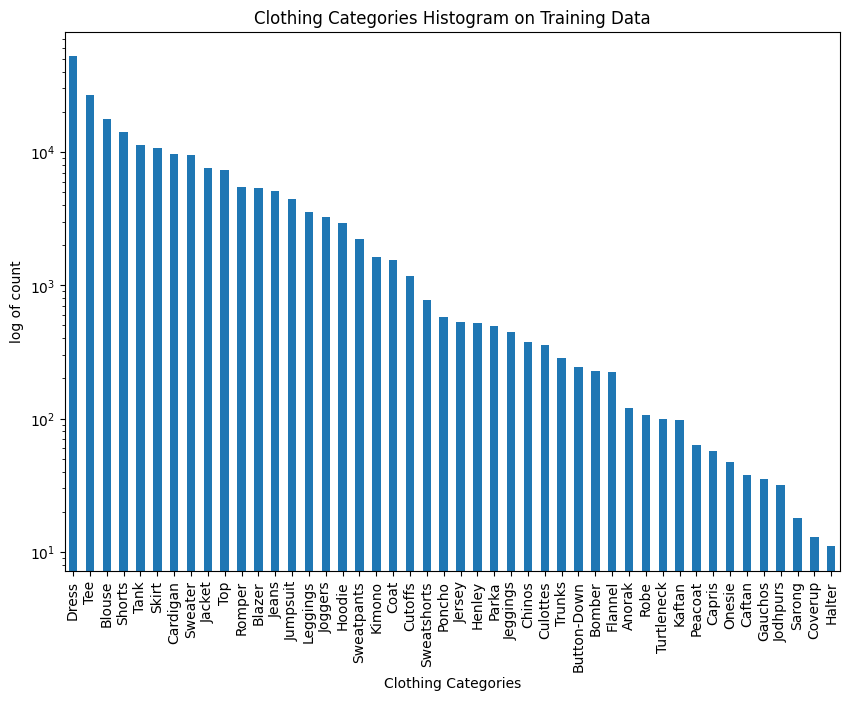

In [31]:
# Plot number of traning samples by category
plt.figure(figsize=(10,7))
ax = training_data["category_name"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Training Data")
plt.show()

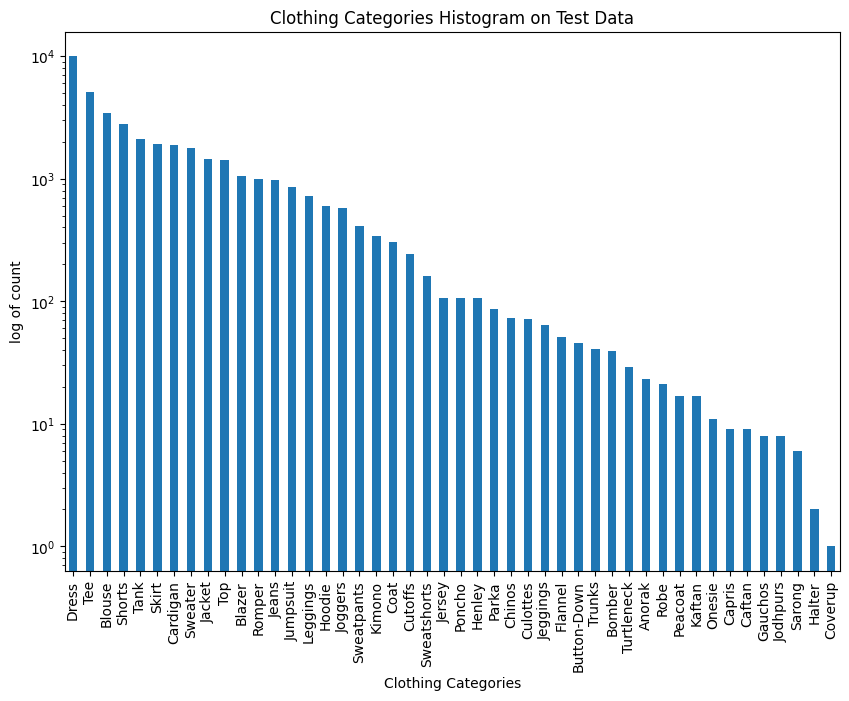

In [32]:
# Plot number of test samples by category
plt.figure(figsize=(10,7))
ax = test_data["category_name"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Categories")
ax.set_title("Clothing Categories Histogram on Test Data")
plt.show()

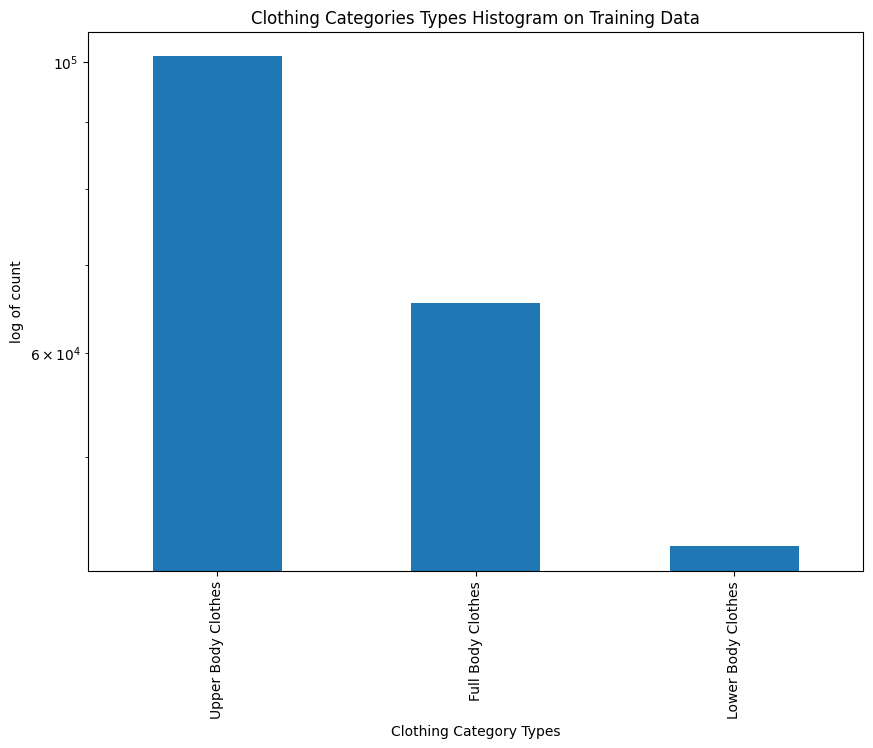

In [33]:
# Plot number of traning samples by category_type
plt.figure(figsize=(10,7))
ax = training_data["category_type"].value_counts().plot(kind='bar', logy=True)
ax.set_ylabel("log of count")
ax.set_xlabel("Clothing Category Types")
plt.xticks([0, 1, 2], ["Upper Body Clothes", "Full Body Clothes", "Lower Body Clothes"])
ax.set_title("Clothing Categories Types Histogram on Training Data")
plt.show()